# Actividad de evaluación: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    21/03/2023
# Introducción a Machine Learning con Python

In [1]:
#Importaciones

#Tratamiento de dataset
import pandas as pd
import numpy as np

#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Métricas de evaluación
from sklearn import metrics

#Time
import time

## Ejercicio 1: Lectura del data set y preprocesamiento
### 1.1 Lectura del dataset
Realizar la lectura del dataset e imprimir la información de sus columnas.<br>
Mostrar por pantalla el contenido de las 5 primeras filas. <br>
Mostrar una descripción de los estadísticos principales de la columnas numéricas.

In [29]:
BARC_DIA_LABORAL = pd.read_csv('./barcelona_weekdays.csv')
BARC_DIA_LABORAL['weekends'] = 0

In [30]:
BARC_DIA_LABORAL1 = BARC_DIA_LABORAL.drop(['room_shared', 'room_private', 'person_capacity', 'multi', 'biz',
                                           'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index',
                                           'attr_index_norm', 'rest_index', 'rest_index_norm'], axis=1)

In [31]:
BARC_DIA_LABORAL1[:5]

,Unnamed: 0,realSum,room_type,host_is_superhost,cleanliness_rating,bedrooms,lng,lat,weekends
0,0,474.317499,Entire home/apt,False,10.0,1,2.17556,41.39624,0
1,1,169.897829,Private room,True,10.0,1,2.14906,41.38714,0
2,2,161.984779,Private room,False,9.0,1,2.15357,41.37859,0
3,3,367.956804,Entire home/apt,False,10.0,1,2.16839,41.37390,0
4,4,196.895292,Private room,False,9.0,1,2.15238,41.37699,0


In [32]:
BARC_FIN_D_SEM = pd.read_csv('./barcelona_weekends.csv')
BARC_FIN_D_SEM['weekends'] = 1
BARC_FIN_D_SEM1 = BARC_FIN_D_SEM.drop(['room_shared', 'room_private', 'person_capacity', 'multi', 'biz',
                                           'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index',
                                           'attr_index_norm', 'rest_index', 'rest_index_norm'], axis=1)

In [33]:
BARC_FIN_D_SEM1[:5]

,Unnamed: 0,realSum,room_type,host_is_superhost,cleanliness_rating,bedrooms,lng,lat,weekends
0,0,532.036214,Entire home/apt,False,10.0,1,2.17556,41.39624,1
1,1,169.897829,Private room,True,10.0,1,2.14906,41.38714,1
2,2,196.895292,Private room,False,9.0,1,2.16500,41.38300,1
3,3,141.271208,Private room,False,9.0,1,2.15342,41.37912,1
4,4,715.200037,Entire home/apt,True,9.0,2,2.17498,41.39214,1


In [34]:
merged_df = pd.concat([BARC_DIA_LABORAL1, BARC_FIN_D_SEM1], axis=0, ignore_index=True)
merged_df[:6]

,Unnamed: 0,realSum,room_type,host_is_superhost,cleanliness_rating,bedrooms,lng,lat,weekends
0,0,474.317499,Entire home/apt,False,10.0,1,2.17556,41.39624,0
1,1,169.897829,Private room,True,10.0,1,2.14906,41.38714,0
2,2,161.984779,Private room,False,9.0,1,2.15357,41.37859,0
3,3,367.956804,Entire home/apt,False,10.0,1,2.16839,41.37390,0
4,4,196.895292,Private room,False,9.0,1,2.15238,41.37699,0
5,5,330.951661,Entire home/apt,False,9.0,2,2.18197,41.40842,0


In [35]:
merged_df.to_csv('barcelona.csv', index=False)

In [14]:
#PELICULAS = pd.read_csv('./valoracion de contenidos2.csv')
BARC_DIA_LABORAL1.info()
print("\n")
BARC_FIN_D_SEM1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1555 non-null   int64  
 1   realSum             1555 non-null   float64
 2   room_type           1555 non-null   object 
 3   host_is_superhost   1555 non-null   bool   
 4   cleanliness_rating  1555 non-null   float64
 5   bedrooms            1555 non-null   int64  
 6   lng                 1555 non-null   float64
 7   lat                 1555 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 86.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1278 non-null   int64  
 1   realSum             1278 non-null   float64
 2   room_type           127

In [8]:
from statistics import mode

## Ejercicio 2. Visualización

En este apartado queremos realizar un análisis exploratorio de los datos, apoyándonos de la visualización. En concreto, nos gustaría estudiar las frecuencias y distribuciones de distintos atributos en función del tipo de producción (*Film* o *Series*).

Para ello, queremos realizar las distintas representaciones gráficas:

### 2.1 Diagramas de tarta

Mostrar un diagrama de tarta con la frecuencia de aparición de los géneros principales para cada uno de estos conjuntos:
    a) Todas las series y películas
    b) Solamente para las series
    c) Solamente para las películas
    
Muestra en cada diagrama los porcentajes de cada género principal y responde a estas preguntas:

    ¿Cuál es el género principal más frecuente en las series?
    ¿Cuál es el género principal más frecuente en las películas?

Grafica Barcelona días laborales


<AxesSubplot:ylabel='room_type'>

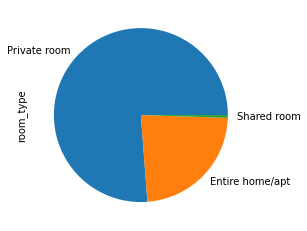

In [11]:
print("Grafica Barcelona días laborales")
BARC_DIA_LABORAL['room_type'].value_counts().plot(kind='pie')

Barcelona Fin de Semana


<AxesSubplot:ylabel='room_type'>

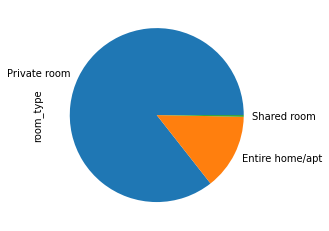

In [12]:
print("Barcelona Fin de Semana")
BARC_FIN_D_SEM['room_type'].value_counts().plot(kind='pie')

In [13]:
print("Barcelona días laborales", BARC_DIA_LABORAL['room_type'].value_counts())
print("\n")
print("Barcelona fin de semana", BARC_FIN_D_SEM['room_type'].value_counts())

Barcelona días laborales Private room       1185
Entire home/apt     362
Shared room           8
Name: room_type, dtype: int64


Barcelona fin de semana Private room       1094
Entire home/apt     180
Shared room           4
Name: room_type, dtype: int64


<AxesSubplot:ylabel='room_type'>

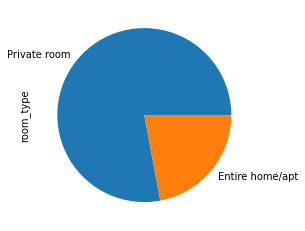

In [14]:
BARC_DIA_LABORAL[(BARC_DIA_LABORAL['host_is_superhost'] == True)]['room_type'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='room_type'>

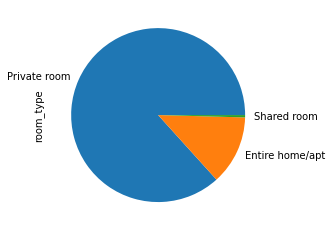

In [15]:
BARC_FIN_D_SEM[(BARC_FIN_D_SEM['host_is_superhost'] == True)]['room_type'].value_counts().plot(kind='pie')

### 2.2 Diagrama de barras

Mostrar un diagrama de barras (o un histograma) con la frecuencia de aparición de las distintas clasificaciones, según el atributo *Certificate*. (https://es.wikipedia.org/wiki/Sistema_de_calificaciones_de_la_Motion_Picture_Association)

Divide cada una de las barras del histograma en dos, haciendo uso del atributo *Type*, y compara las certificaciones para ambos tipos de producciones, series y películas.

Realiza una breve interpretación de la representación obtenida.

In [24]:
# llamo a la tabla para poder visionar bien la información
PELICULAS

,Date,Rate,Votes,Main genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,2021,7.6,107163.0,Action,163.0,Film,PG-13,1.0,Mild,Moderate,Mild,Mild,Moderate
1,2021,6.3,64375.0,Crime,90.0,Film,R,1.0,None,None,Severe,None,Moderate
2,2021,6.4,27145.0,Crime,120.0,Film,R,1.0,Moderate,Severe,Severe,Moderate,Moderate
3,2021,6.4,30443.0,Action,97.0,Film,PG-13,1.0,None,Moderate,Moderate,Mild,Moderate
4,2021,8.3,84636.0,Action,155.0,Film,PG-13,1.0,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,2011,3.8,37492.0,Horror,91.0,Film,Not Rated,1.0,Severe,Severe,Severe,Mild,Severe
6174,1944,8.3,150448.0,Crime,107.0,Film,Passed,1.0,None,Mild,None,Mild,Mild
6175,2007,7.3,100668.0,Crime,117.0,Film,R,1.0,Severe,Moderate,Severe,Severe,Severe
6176,2021,6.0,887.0,Comedy,100.0,Film,PG-13,1.0,None,None,Mild,Moderate,None


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'R'),
  Text(2, 0, 'TV-MA'),
  Text(3, 0, 'None'),
  Text(4, 0, 'TV-14'),
  Text(5, 0, 'TV-PG'),
  Text(6, 0, 'PG'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, '(Banned)'),
  Text(9, 0, 'Not Rated'),
  Text(10, 0, 'E'),
  Text(11, 0, 'NC-17'),
  Text(12, 0, 'TV-Y7-FV'),
  Text(13, 0, 'TV-Y7'),
  Text(14, 0, 'Unrated'),
  Text(15, 0, 'Approved'),
  Text(16, 0, 'G'),
  Text(17, 0, 'TV-Y'),
  Text(18, 0, 'GP'),
  Text(19, 0, 'Passed'),
  Text(20, 0, 'M'),
  Text(21, 0, 'X'),
  Text(22, 0, 'M/PG')])

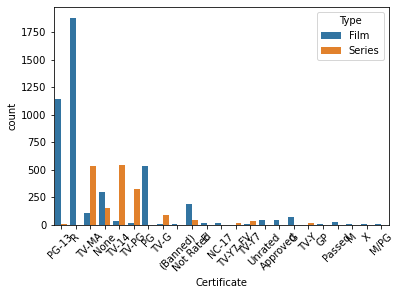

In [25]:
sns.countplot(data=PELICULAS, x='Certificate', hue='Type')
plt.xticks(rotation=45)

In [16]:
BARC_DIA_LABORAL

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,474.317499,Entire home/apt,False,False,4.0,False,0,1,10.0,91.0,1,1.111996,0.630491,526.469420,17.942927,915.587083,20.154890,2.17556,41.39624
1,1,169.897829,Private room,False,True,2.0,True,1,0,10.0,88.0,1,1.751839,0.124017,320.127526,10.910462,794.277350,17.484489,2.14906,41.38714
2,2,161.984779,Private room,False,True,4.0,False,0,1,9.0,88.0,1,1.670493,0.080322,344.073936,11.726595,840.673617,18.505814,2.15357,41.37859
3,3,367.956804,Entire home/apt,False,False,3.0,False,0,1,10.0,91.0,1,1.475847,0.093107,400.057449,13.634603,946.589884,20.837357,2.16839,41.37390
4,4,196.895292,Private room,False,True,3.0,False,1,0,9.0,91.0,1,1.855452,0.272486,346.042245,11.793678,792.296039,17.440874,2.15238,41.37699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,1550,769.660437,Entire home/apt,False,False,6.0,False,0,1,8.0,84.0,3,2.503374,0.554007,266.281630,9.075307,678.961341,14.946029,2.19991,41.38834
1551,1551,318.151139,Private room,False,True,2.0,True,1,0,9.0,98.0,1,2.619616,0.761843,256.669559,8.747713,557.672173,12.276081,2.20066,41.39204
1552,1552,248.562851,Private room,False,True,2.0,True,1,0,10.0,98.0,1,2.700091,0.866258,250.530700,8.538490,539.136706,11.868058,2.20140,41.39286
1553,1553,1770.661205,Entire home/apt,False,False,6.0,True,0,1,10.0,100.0,3,2.401191,0.461678,277.522208,9.458404,676.248720,14.886316,2.19873,41.38724


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2.0'),
  Text(1, 0, '3.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '5.0'),
  Text(4, 0, '6.0')])

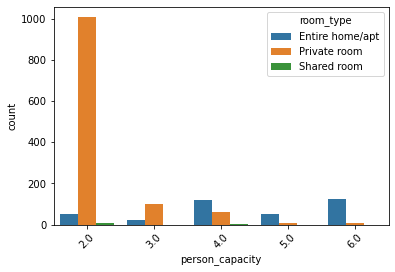

In [19]:
sns.countplot(data=BARC_DIA_LABORAL, x='person_capacity', hue='room_type')
plt.xticks(rotation=45)

In [ ]:
# se puede observar que existen muchos mas certificados de tipo "PG-13" y de tipo "R" para películas
# y que por ejemplo, hay más certificados de tipo "TV-MA" y "TV-14" en series con respecto a las películas

### 2.3 Histograma con estimación KDE

Mostrar un diagrama con histograma y estimación KDE de la distribución de probabilidad del atributo valoración, en función del tipo de producción (realizar un ajuste del parámetro bins para una mejor visualización)

Realiza una breve interpretación de la representación obtenida.

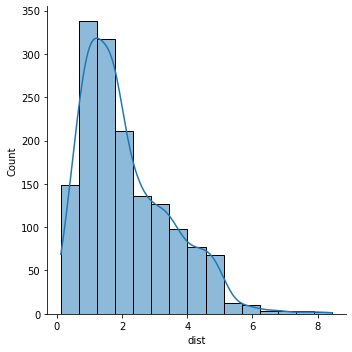

In [20]:
sns.displot(BARC_DIA_LABORAL, x ='dist', kde=True, bins=15)

In [ ]:
# cada observación aumenta la densidad de probabilidad en la zona donde se encuentra

### 2.4 Diagrama de puntos

Genera diagrama de puntos para mostrar la distribución de la valoración (*Rate*) frente al año de producción (*Date*), usando el número de votos *Votes* para la intensidad del color.

Realiza una breve interpretación de la representación obtenida.

<AxesSubplot:xlabel='Rate', ylabel='Date'>

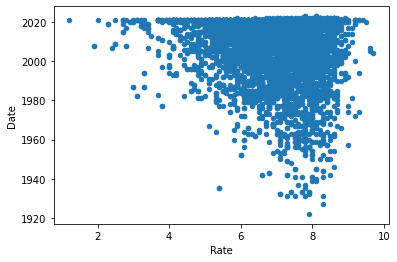

In [27]:
PELICULAS.plot(x='Rate', y='Date', kind='scatter')

In [ ]:
# cada punto representa una linea de la tabla, básicamente estamos viendo la valoración por años

### 2.5 Función de densidad de probabilidad KDE

Analiza las distribuciones de probabilidad para el atributo valoración (*Rate*) según los distintos tipos de contenido (*Nudity*,*Violence*,*Profanity*,*Alcohol*,*Frightening*), de forma separada para cada tipo de producción (*Film* y *Series*)<br>

Realiza una breve interpretación de las gráficas obtenidas.



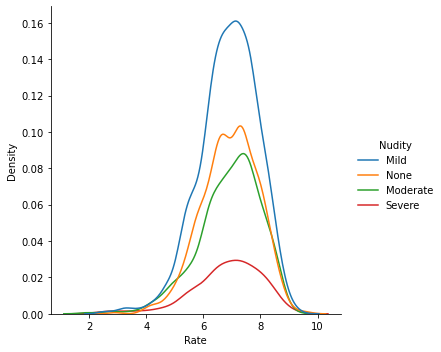

In [28]:
sns.displot(PELICULAS, x ='Rate', kind='kde', hue='Nudity')

In [ ]:
# suelen tener escenas de desnudos leves (mind)

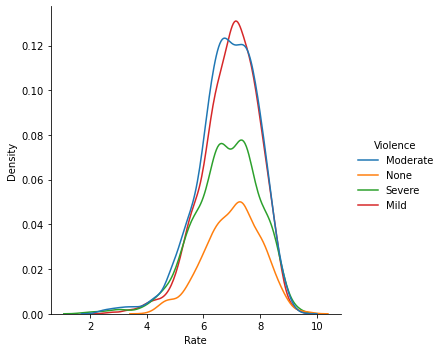

In [29]:
sns.displot(PELICULAS, x ='Rate', kind='kde', hue='Violence')

In [ ]:
# suelen tener escenas de violencia moderas y leves, aunque existe un pico en las leves

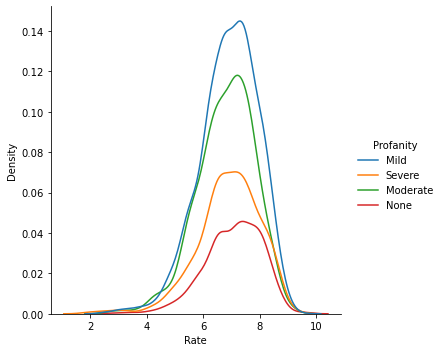

In [30]:
sns.displot(PELICULAS, x ='Rate', kind='kde', hue='Profanity')

In [ ]:
# suelen tener escenas de blasfemia leves y moderadas

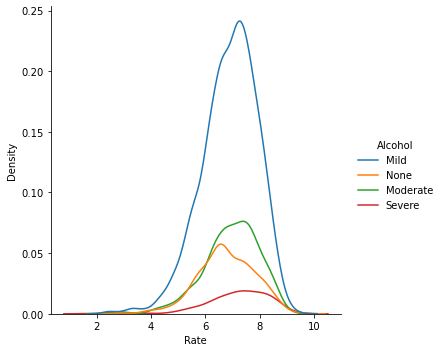

In [31]:
sns.displot(PELICULAS, x ='Rate', kind='kde', hue='Alcohol')

In [ ]:
# suelen tener escenas de alcohol moderas

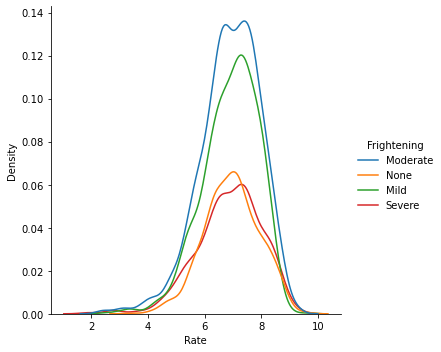

In [32]:
sns.displot(PELICULAS, x ='Rate', kind='kde', hue='Frightening')

In [ ]:
# suelen tener escenas "alarmantes" suaves o moderadas

### 2.6 Mapa de calor

Crear un mapa de calor con la frecuencia de cada posible pareja de valores de los atributos clasificación (*Certificate*) y género_principal (*Main genre*), teniendo en cuenta solamente las instancias de tipo serie (*Series*)<br>

A la vista de los resultados, ¿Cuales son las combinaciones más frecuentes?

¿Y para películas (*Film*)?

<AxesSubplot:xlabel='Main genre', ylabel='Certificate'>

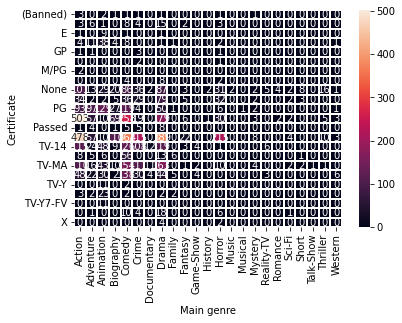

In [94]:
tabla = pd.crosstab(index=PELICULAS['Certificate'], columns =PELICULAS['Main genre'])
#print(tabla)

sns.heatmap(tabla, annot=True, fmt='d', linewidths=2)

In [82]:
PELICULAS

,Date,Rate,Votes,Main genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,2021,7.6,107163.0,Action,163.0,Film,PG-13,1.0,Mild,Moderate,Mild,Mild,Moderate
1,2021,6.3,64375.0,Crime,90.0,Film,R,1.0,None,None,Severe,None,Moderate
2,2021,6.4,27145.0,Crime,120.0,Film,R,1.0,Moderate,Severe,Severe,Moderate,Moderate
3,2021,6.4,30443.0,Action,97.0,Film,PG-13,1.0,None,Moderate,Moderate,Mild,Moderate
4,2021,8.3,84636.0,Action,155.0,Film,PG-13,1.0,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,2011,3.8,37492.0,Horror,91.0,Film,Not Rated,1.0,Severe,Severe,Severe,Mild,Severe
6174,1944,8.3,150448.0,Crime,107.0,Film,Passed,1.0,None,Mild,None,Mild,Mild
6175,2007,7.3,100668.0,Crime,117.0,Film,R,1.0,Severe,Moderate,Severe,Severe,Severe
6176,2021,6.0,887.0,Comedy,100.0,Film,PG-13,1.0,None,None,Mild,Moderate,None


### 2.7 Diagrama de cajas

Mostrar un diagrama de cajas para el atributo valoración (*Rates*), en función del tipo de producción (*Type*).

Realiza una breve interpretación de las gráficas obtenidas.

<AxesSubplot:xlabel='Type', ylabel='Rate'>

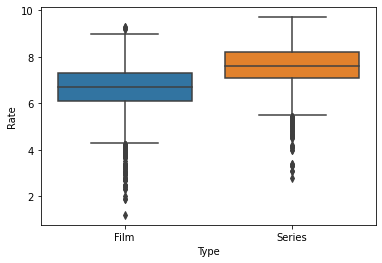

In [99]:
sns.boxplot(x='Type', y='Rate', data=PELICULAS)

### 2.8 Diagrama de violín

Mostrar un diagrama de violín para el atributo valoración (*Rates*), en función del tipo del género principal (*Main genre*) y para cada tipo de producción.

Realiza una breve interpretación de las gráficas obtenidas.

### 2.9 Escoge una representación gráfica

Realiza una representación gráfica que te resulte de interés, y haz una breve interpretación.

## Ejercicio 3. Codificación de atributos
### 3.1. Tipos de atributos

A partir de este aparatado trabajaremos solamente con las instancias correspondientes a los tres géneros más frecuentes.
Para ello seguiremos los siguientes pasos:

- Crear un nuevo dataframe solamente con las instancias de los **tres géneros más frecuentes**
- Imprimir los posibles valores de los atributos categóricos

### 3.2. Codificación de los atributos categóricos

Realizar una codificación de tipo **label_encoding** para el atributo *Main genre*. La codificación resultante debe asignarle el valor 0 a *Drama*, el valor 1 a *Action* y el valor 2 a *Comedy*. Aunque no parezca ser a priori la codificación más adecuada para este atributo, lo haremos así de cara a poder realizar tareas de predicción sobre él en el apartado siguiente.


Realizar el tipo de codificación más apropiada para el resto de los atributos categóricos, justificando el tipo de codificación elegida en cada caso.

## Ejercicio 4. Predicción - Clasificación

Queremos construir un modelo de predicción para el atributo correspondiente al género principal (*Main genre*). <br>
Para ello, seguiremos los siguientes pasos:

- Realizar la división en X e y del dataset.
- Crear un DataFrame para almacenar los resultados que tenga dos columnas: accuracy, tiempo.
- Definir una función experimento que realice un experimento de clasificación, a partir de un estimador concreto. La función devolverá el valor de la medida accuracy y el tiempo empleado, con una validación cruzada de 10 particiones.
- Añadir a la tabla de resultados al menos 5 líneas en las que se prueben 5 clasificadores diferentes (o algunos iguales con distinta parametrización)                                                         


Muestra mediante un mapa de calor la matriz de confusión correspondiente al mejor modelo.<br>
Explica cual es el tipo de error donde se producen el mayor número de errores, así como el tipo de aciertos con el mayor número de aciertos.